In [16]:
import os
import cv2
import imghdr
import numpy as np
import matplotlib.pyplot as plt
# In Python, you can use pickle to serialize (deserialize) an object structure into (from) a byte stream
import pickle
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

## **1. Remove dodgy images**

In [2]:
image_exts = ["jpg","jpeg","bmp","png"]

In [3]:
data_dir = 'data'
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print(f"Image not in ext lish {image_path}")
                os.remove(image_path)
        except Exception as e:
            print(f"Issu with image {image_path}")

Image not in ext lish data/cat/344x361_FoundACat.jpg
Image not in ext lish data/cat/vector8.svg
Image not in ext lish data/cat/vector6.svg
Image not in ext lish data/cat/vector.svg
Image not in ext lish data/cat/seven-steps-to-toilet-train-cat-1.jpg
Image not in ext lish data/cat/portrait-gray-tabby-cat-on-260nw-1180312252.jpg
Image not in ext lish data/cat/vector12.svg
Image not in ext lish data/cat/cat-behaviour.jpg
Image not in ext lish data/cat/vector4.svg
Image not in ext lish data/cat/portrait-surprised-cat-scottish-straight-260nw-499196506.jpg
Image not in ext lish data/cat/cat-toes-paw-number-paws-tiger-tabby.jpg
Image not in ext lish data/cat/1200px-Cat_November_2010-1a.jpg
Image not in ext lish data/cat/blue-eyed-cat-260nw-259729697.jpg
Image not in ext lish data/cat/vector10.svg
Image not in ext lish data/cat/the-cat-on-white-background_155003-15381.jpg
Image not in ext lish data/cat/vector3.svg
Image not in ext lish data/cat/vector5.svg
Image not in ext lish data/cat/cs-pet

> **We create data in this code below and then we using pickle for create data for training model**

In [8]:
categories = os.listdir(data_dir)
categories
data = []
for image_class in os.listdir(data_dir):
    path = os.path.join(data_dir, image_class)
    label = categories.index(image_class)
    for img in os.listdir(path):
        imgpath = os.path.join(path,img)
        try:
            pet_img = cv2.imread(imgpath,0)
            pet_img = cv2.resize(pet_img, (50,50))
            image = np.array(pet_img).flatten()
            data.append([image, label])
        except Exception as e:
            pass

print(len(data))   

316


## **2. Create data for training**

In [12]:
pick_in = open('data1.pickle', 'wb')
pickle.dump(data, pick_in)
pick_in.close()

In [14]:
pick_out = open('data1.pickle','rb')
data = pickle.load(pick_out)
pick_out.close()

```
[[[1,2,3,4],0], [ [1,2,3,6],0]]
feature = [1,2,3,6]
label = 0
```

In [18]:
import random


random.shuffle(data)
features = []
labels = []

for feature, label in data:
    features.append(feature)
    labels.append(label)

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size=0.25, shuffle=True)
model = SVC(C=1, kernel='poly', gamma='auto')

In [20]:
model.fit(xtrain, ytrain)

SVC(C=1, gamma='auto', kernel='poly')

In [22]:
prediction = model.predict(xtest)

In [27]:
accuracy = model.score(xtest, ytest)
print(f"Accuracy: {accuracy}")
print(f"Prediction is: {categories[prediction[0]]}")

Accuracy: 0.6708860759493671
Prediction is: cat


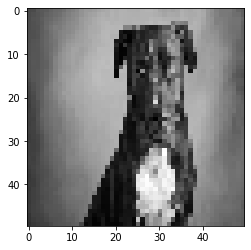

In [29]:
from ctypes.wintypes import RGB


img = xtest[0].reshape(50,50)
plt.imshow(img, cmap='gray')
plt.show()

## **3. Save model**

In [30]:
pick = open('model.sav', 'wb')
pickle.dump(model, pick)
pick.close()